## 2.5 多層パーセプトロン
単一のパーセプトロンではXORゲートを分類できないが、「複数重ねる」ことでできる
### 2.5.1 既存ゲートの組み合わせ
AND, NAND,ORを組み合わせることで、XORを作ることができる

s1 = NAND(x1,x2)

s2 = OR(x1,x2)

y = AND(s1,s2)

のようにしてXORを実現可能である。

| $x_1$ | $x_2$ | $s_1$ |$s_2$ | y=XOR(x1,x2) |
| ---- | ---- | ---- | ---- | ----| 
| 0| 0 | 1 | 0 | 0 |
| 1| 0 | 1 | 1 | 1 |
| 0| 1 | 1 | 1 | 1 |
| 1| 1 | 0 | 1 | 0 |
### 2.5.2 XORゲートの実装

In [2]:
import numpy as np
import matplotlib as pld

# まず、AND, NAND,ORを実装
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [4]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


試しに境界線を描画する

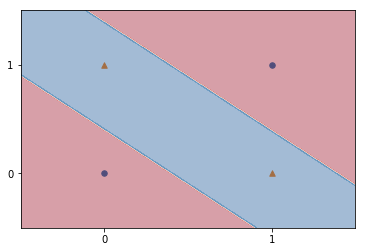

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

if __name__ == "__main__":
    xs_0 = np.array([[0, 0],[1,1]], dtype=np.float32)      # データ
    xs_1 = np.array([[1, 0],[0, 1]], dtype=np.float32)

    # グラフの描画 from https://teratail.com/questions/177319
    fig, ax = plt.subplots()
    ax.set_xticks([0, 1]), ax.set_yticks([0, 1])
    ax.set_xlim(-0.5, 1.5), ax.set_ylim(-0.5, 1.5)

    # サンプルを描画する。
    ax.scatter(xs_0[:, 0], xs_0[:, 1], marker='o', s=30)
    ax.scatter(xs_1[:, 0], xs_1[:, 1], marker='^', s=30)

    # 各点の推論結果を得る。
    X, Y = np.meshgrid(np.linspace(*ax.get_xlim(), 100),
                       np.linspace(*ax.get_ylim(), 100))
    XY = np.column_stack([X.ravel(), Y.ravel()])
    Z = np.array([XOR(x[0], x[1]) for x in XY]).reshape(X.shape)

    # 等高線を描画する。
    ax.contourf(X, Y, Z, alpha=0.4, cmap='RdBu')

    plt.show()

ANDやORは単層パーセプトロンであったが、XORは多層パーセプトロン(2層)であると言える
![XORのパーセプトロン表記](per.png)
単層パーセプトロンで実現できなかったことがそうを深くすることで柔軟な表現が可能になった